# Extraction de Rectangles

### Utilisation de la bibliothèque diagonal_crop
Github: https://github.com/jobevers/diagonal-crop
Installation depuis la console Anaconda: pip install git+git://github.com/jobevers/diagonal-crop.git

In [5]:
import numpy as np
from PIL import Image
import diagonal_crop
import matplotlib.pyplot as plt
import glob

### Demo

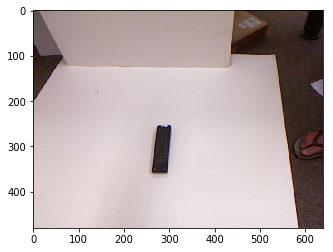

In [6]:
im = Image.open('pcd0100r.png')
plt.imshow(im)
plt.show()

In [7]:
angle = np.pi/3
base = (200, 300) # point en haut à gauche du rectangle
height = 150
width = 200
cropped_im = diagonal_crop.crop(im, base, angle, height, width)

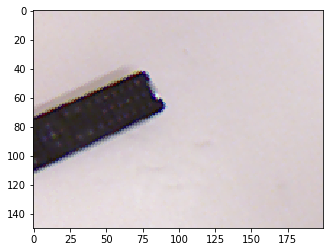

(150, 200, 3)

In [8]:
plt.imshow(cropped_im)
plt.show()
np.shape(cropped_im)

### Récupérer tous les rectangles (dont les paramètres sont définis) d'une image

In [9]:
def extraction_rectangle(filename,angle,height,width,dh,dw):
    im=Image.open(filename)
    h_image,w_image,d_image=np.shape(im)
    
    liste_rectangles=np.zeros(((h_image//dh), (w_image//dw),height,width,3))
    liste_index=np.zeros(((h_image//dh), (w_image//dw),4))
    
    
    for y in range(0,h_image+dh,dh):
        if not (y+height) > h_image:
            
            for x in range(0,w_image,dw):
                
                 if not x+width >w_image:
                    liste_rectangles[y//dh][x//dw]=diagonal_crop.crop(im, (x,y), angle, height, width)
                    liste_index[y//dh][x//dw]=[y,x,dh,dw]
                        
    return liste_rectangles,liste_index
    

(2, 2, 240, 320, 3)


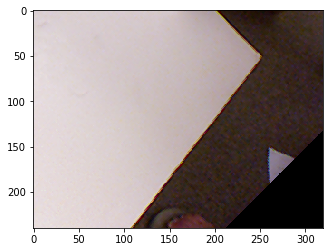

In [10]:
liste,index=extraction_rectangle('pcd0100r.png',np.pi/4,240,320,240,320)
print(np.shape(liste))
im1=np.uint8(liste[1][1]) #Je ne sais pas pourquoi, mais sans ça l'image est codé en float et s'affiche en négatif
plt.imshow(im1)
plt.show()

### Sauver tous les rectangles (définis) d'une image source sous forme d'images

In [11]:
def save_rectangles(filename,angle,height,width,dh,dw):
    liste,index=extraction_rectangle(filename,angle,height,width,dh,dw)
    for i in range(len(liste)):
        for j in range(len(liste[i])):
            image=Image.fromarray(np.uint8(liste[i][j]))
            image.save(filename[:-4] +'_rect_'+str(i)+str(j)+'_.png', "PNG")
    return   

In [12]:
save_rectangles('pcd0100r.png',0,240,320,240,320)

### Idem avec tous les angles séparés d'un pas dtheta

In [13]:
def save_all_rectangles(filename,dtheta,height,width,dh,dw,outputFolder):
    if dtheta != 0:
        for k in range(0,360,dtheta):
            angle=k*2*np.pi/360
            liste,index=extraction_rectangle(filename,angle,height,width,dh,dw)
            for i in range(len(liste)):
                for j in range(len(liste[i])):
                    image=Image.fromarray(np.uint8(liste[i][j]))
                    image.save(outputFolder + filename[:-4] +'_rect_'+str(i)+'_'+str(j)+'_'+str(k)+'_.png', "PNG")
    else: 
        liste,index=extraction_rectangle(filename,0,height,width,dh,dw)
        for i in range(len(liste)):
            for j in range(len(liste[i])):
                image=Image.fromarray(np.uint8(liste[i][j]))
                image.save(outputFolder +'/'+ filename[:-4] +'_rect_'+str(i)+'_'+str(j)+'_'+str(0)+'_.png', "PNG")
    return   

In [16]:
save_all_rectangles('pcd0100r.png',0,240,320,240,320,'./Echantillon1')

### ATTENTION: Reste un problème de dimensions d'array à regler!

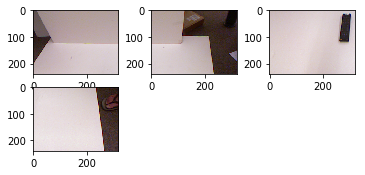

In [17]:
image_list = []
for filename in glob.glob(r'C:\Users\Admin\Desktop\PJT\Jupyter\Echantillon1\*.png'):
    im=Image.open(filename)
    image_list.append(np.asarray( im ))
for i in range(len(image_list)):
    plt.subplot(330 + 1 + i)
    plt.imshow(image_list[i])
plt.show()